# Aufgabe 2: Gaußfilter
Anstatt wie in der vorigen Aufgabe an einer ausgewählten Frequenz hart abzuschneiden, kann mittels eines Faktors
\begin{align}
 h(u,v) = \mathrm{e}^{-\frac{D^2(u,v)}{2\sigma^2}},\qquad h \in [0;1]
\end{align}
auch ein weicher Übergang erzeugt werden.

Verwenden Sie eine Gauß-Glocke für die Hoch und Tiefpassfilterung und berechnen Sie den Faktor $h$ in Abhängigkeit von der Entfernung $D(u,v)$ zum Ursprung!
Führen Sie die Transformationen ansonsten wie in Teilaufgabe 1 durch! Die Varianz $\sigma$ der Gauß-Glocke ist also mit dem dort gegebenen Radius gleichzusetzen.
Was ändert sich in den Ausgabebildern im Vergleich zu Teilaufgabe 1?

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np

import math

In [2]:
# image_filter = 'Bilder/*.jpg'
image_filter = 'Bilder/Aerial.jpg'

## 1. Definition des Filters

Definieren Sie den Gauß-Filter als Funktion des Radius $D$ und der Konstante $\sigma$:

In [3]:
sigma = 20
lowpass_filter = lambda D: np.exp(-D**2/(2*sigma**2))
highpass_filter = lambda D: 1-np.exp(-D**2/(2*sigma**2))

## 2. Laden des Bildes

In [4]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

## 3. Normalisieren des Bildes

In [5]:
image_max = np.float32(np.max(image))  # Maximum bestimmen
image_min = np.float32(np.min(image))  # Minimum bestimmen
image = (np.float32(image) - image_min) / (image_max-image_min)

## 4. Berechnung der Fouriertransformation
Setzen Sie hier ihre Lösung aus der vorigen Aufgabe ein:

In [6]:
image_transformed = np.fft.fftshift(np.fft.fft2(image))
image_transformed

array([[ 16.74902323-8.30078194e-14j,  -2.45381899-2.93665790e+01j,
        -10.20118345+1.37282118e+00j, ...,  18.31036561-1.28449309e+01j,
        -10.20118345-1.37282118e+00j,  -2.45381899+2.93665790e+01j],
       [  4.69363042+7.34664368e+00j,  19.71034031-3.24644245e+00j,
          1.88110114-1.77615114e+01j, ...,  12.75680309+6.01929057e+00j,
          2.3169379 +9.02047869e+00j,  -8.15130324+1.31038972e+01j],
       [  4.10267961+3.14277381e-01j, -13.22794111-3.66886707e-01j,
          6.94019874+4.50360297e-02j, ...,   5.24790613+3.94832949e+00j,
        -16.95972215+7.25260088e-01j, -18.68419384+1.69021495e+01j],
       ...,
       [  9.83463402-7.72395135e+00j, -19.20908188-2.35590181e+00j,
          1.14913787+4.95644019e+00j, ...,  -1.0999619 -2.45409374e+00j,
         -2.62497583+6.98342886e+00j,   2.92759893+1.95109602e+01j],
       [  4.10267961-3.14277381e-01j, -18.68419384-1.69021495e+01j,
        -16.95972215-7.25260088e-01j, ...,  -8.83182288-6.48687403e+00j,
       

## 5. Filterung

Setzen Sie hier ihre Lösung `ex3_filter_spectrum` aus der vorigen Aufgabe ein:

In [7]:
def ex3_filter_spectrum(spectrum, radial_filter):
    center=(image_transformed.shape[0]//2, image_transformed.shape[1]//2)
    h=np.empty(spectrum.shape)
    
    for u in range(spectrum.shape[0]):
        for v in range(spectrum.shape[1]):
            D=((u-center[0])**2+(v-center[1])**2)**0.5
            h[u][v]=radial_filter(D)
    
    spectrum=spectrum*h
    return spectrum

Das transformierte Bild (Spektrum) wird nun gefiltert:

In [8]:
image_transformed_filtered_highpass = ex3_filter_spectrum(image_transformed, highpass_filter)
image_transformed_filtered_lowpass = ex3_filter_spectrum(image_transformed, lowpass_filter)
image_transformed_filtered_lowpass

array([[ 9.06453664e-159-4.49236597e-173j,
        -3.44672797e-159-4.12494197e-158j,
        -3.70969043e-158+4.99230467e-159j, ...,
         1.71957459e-157-1.20630123e-157j,
        -3.70969043e-158-4.99230467e-159j,
        -3.44672797e-159+4.12494197e-158j],
       [ 6.62589956e-159+1.03711027e-158j,
         7.22168338e-158-1.18946599e-158j,
         1.78434608e-158-1.68479423e-157j, ...,
         3.12496882e-157+1.47451483e-157j,
         2.19776544e-158+8.55650742e-158j,
        -2.98656087e-158+4.80114475e-158j],
       [ 1.50694590e-158+1.15436509e-159j,
        -1.26104525e-157-3.49760205e-159j,
         1.71290372e-157+1.11152988e-159j, ...,
         3.34490658e-157+2.51658337e-157j,
        -4.18581257e-157+1.79000739e-158j,
        -1.78120040e-157+1.61131466e-157j],
       ...,
       [ 9.37554714e-158-7.36339247e-158j,
        -4.75284213e-157-5.82913303e-158j,
         7.36108013e-158+3.17496745e-157j, ...,
        -1.81963356e-157-4.05973274e-157j,
        -1.68149165

## 6. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [9]:
image_highpass = np.fft.ifft2((np.fft.ifftshift(image_transformed_filtered_highpass)))
image_lowpass  = np.fft.ifft2((np.fft.ifftshift(image_transformed_filtered_lowpass )))

def image_filter(img_fil,img):
    img_fil=np.abs(img_fil)*255
    res=img_fil[0:img.shape[0],0:img.shape[1]]
    
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            res[i][j] = min(max(0,res[i][j]),255)
    return res
   
image_highpass=image_filter(image_highpass,image)
image_lowpass=image_filter(image_lowpass,image)
image_lowpass

array([[197.92731225, 198.18271845, 198.19915545, ..., 195.91486185,
        196.7598854 , 197.44438295],
       [200.75624683, 200.75215957, 200.53897789, ..., 199.64030823,
        200.17437054, 200.55730896],
       [203.39194557, 203.12578984, 202.68395912, ..., 203.19423827,
        203.40867623, 203.4824853 ],
       ...,
       [188.5155571 , 189.42900633, 190.05107894, ..., 184.32943795,
        185.91843761, 187.33242348],
       [191.77967641, 192.50375107, 192.94648347, ..., 188.19664208,
        189.58170459, 190.79364356],
       [194.92664755, 195.42826859, 195.6663486 , ..., 192.0791276 ,
        193.21232549, 194.17742802]])

Vergleichen Sie nun das gefilterte Bild mit dem Originalbild:

<IPython.core.display.Javascript object>


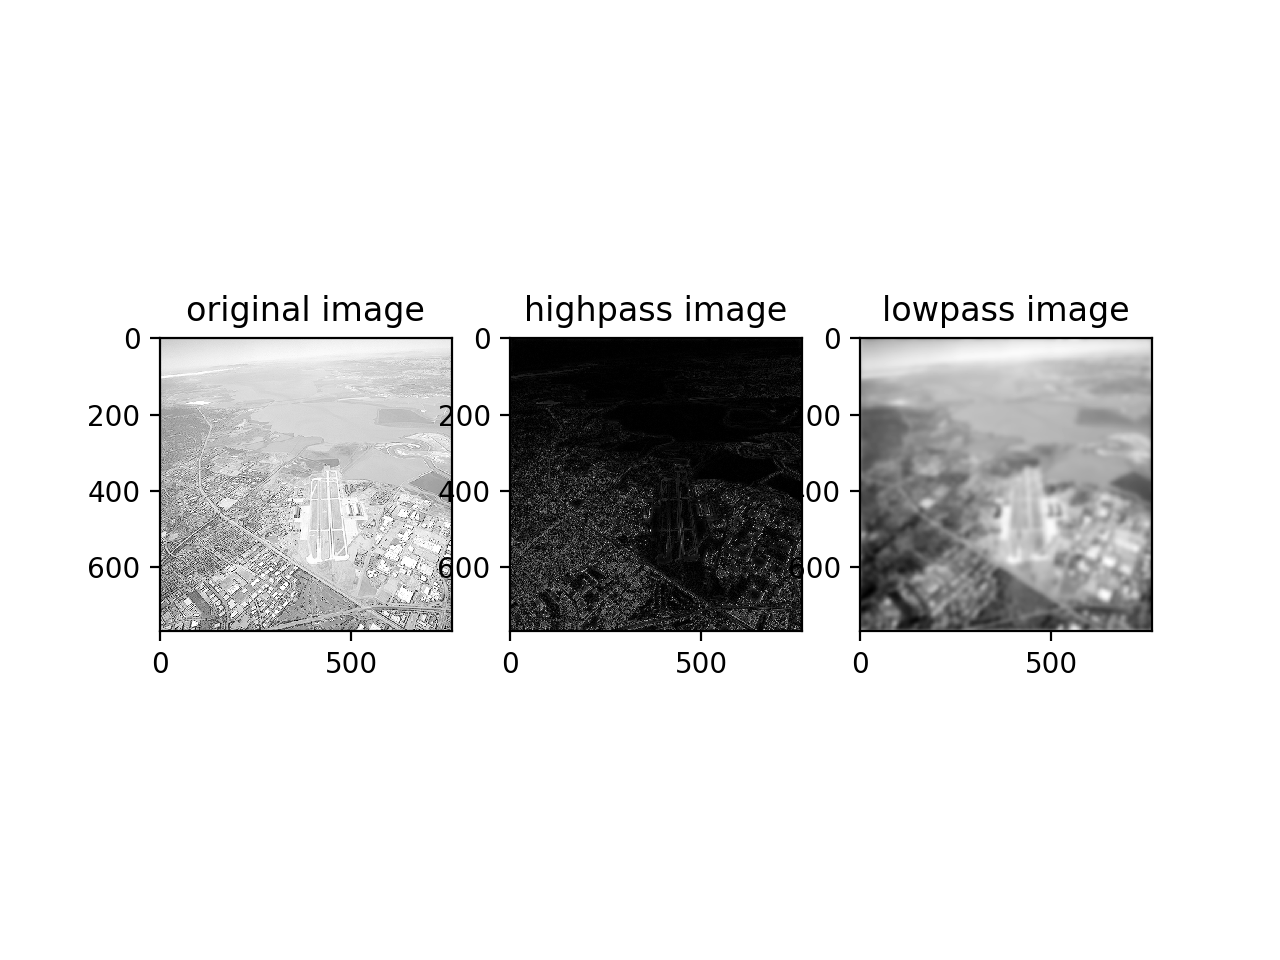

In [10]:
plt.figure('Image')

plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1,3,2)
plt.title('highpass image')
plt.imshow(image_highpass, cmap='gray')

plt.subplot(1,3,3)
plt.title('lowpass image')
plt.imshow(image_lowpass, cmap='gray')
plt.show()